In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

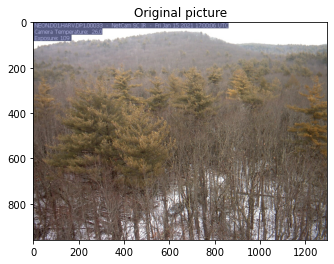

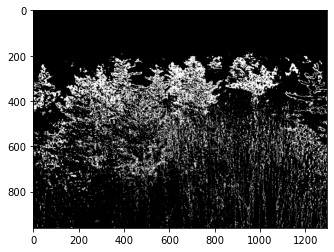

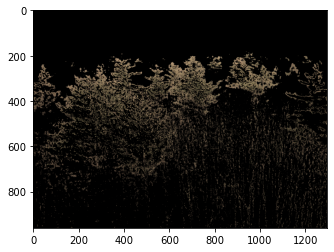

In [24]:
# get the green mask in January in Jan 15,2021
jan_15_img_name = "NEON.D01.HARV.DP1.00033_2021_01_15_120006.jpg"
jan_15_cv_img = cv2.imread("../data_raw/HARV_Canopy/" + jan_15_img_name)
jan_15_rgb = cv2.cvtColor(jan_15_cv_img, cv2.COLOR_BGR2RGB)
jan_15_hsv = cv2.cvtColor(jan_15_cv_img, cv2.COLOR_BGR2HSV)
jan_15_mask = cv2.inRange(jan_15_hsv, (13,78,61), (26,100,255))

plt.imshow(jan_15_rgb)
plt.title("Original picture")
plt.show()

plt.imshow(jan_15_mask, cmap="gray")
plt.title("The mask")
plt.show()

jan_15_after_mask = cv2.bitwise_and(jan_15_rgb, jan_15_rgb, mask=jan_15_mask)
plt.imshow(jan_15_after_mask)
plt.title("original picture with mask")
plt.show()

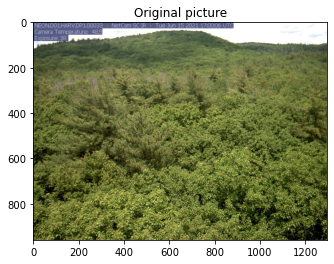

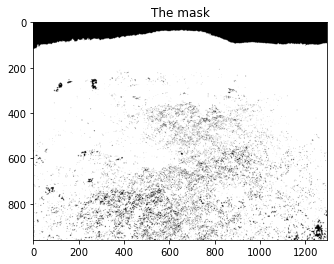

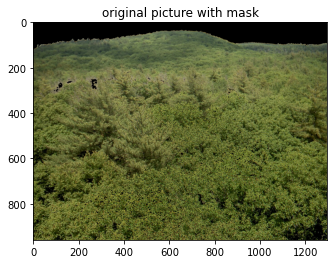

In [26]:
# get the green mask in June in Jun 15,2021
jun_15_img_name = "NEON.D01.HARV.DP1.00033_2021_06_15_120006.jpg"
jun_15_cv_img = cv2.imread("../data_raw/HARV_Canopy/" + jun_15_img_name)
jun_15_rgb = cv2.cvtColor(jun_15_cv_img, cv2.COLOR_BGR2RGB)
jun_15_hsv = cv2.cvtColor(jun_15_cv_img, cv2.COLOR_BGR2HSV)
jun_15_mask = cv2.inRange(jun_15_hsv, (21,10,0), (110,255,173))

plt.imshow(jun_15_rgb)
plt.title("Original picture")
plt.show()

plt.imshow(jun_15_mask, cmap="gray")
plt.title("The mask")
plt.show()

jun_15_after_mask = cv2.bitwise_and(jun_15_rgb, jun_15_rgb, mask=jun_15_mask)
plt.imshow(jun_15_after_mask)
plt.title("original picture with mask")
plt.show()

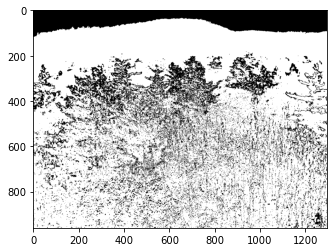

In [27]:
situated_area = cv2.bitwise_xor(jun_15_mask, jan_15_mask)
plt.imshow(situated_area, cmap="gray")
plt.title("Situated Area")
plt.show()